_version log: Cleaning up code and understanding theory_

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [10]:
def single_sided_ft(x, Fs):
    N = x.shape[0] #number of data points
    NFFT = 2 ** np.ceil(np.log2(N)) #round up to the next power of 2
    X = np.fft.fft(x, int(NFFT)) / N #fast fourier transform with optimised upper limit and correct normalisation.
    f = Fs / 2 * np.linspace(0, 1, int(NFFT / 2 + 1)) # create an array of wavenumbers up to the nyquist frequency. Fs/2 is the nyquist frequency
    X = 2 * np.abs(X[:int(NFFT / 2 + 1)]) # ignore phase by removing negative frequencies. NFFT/2+1 is the number of fft data points with positive frequencies
    return X, f

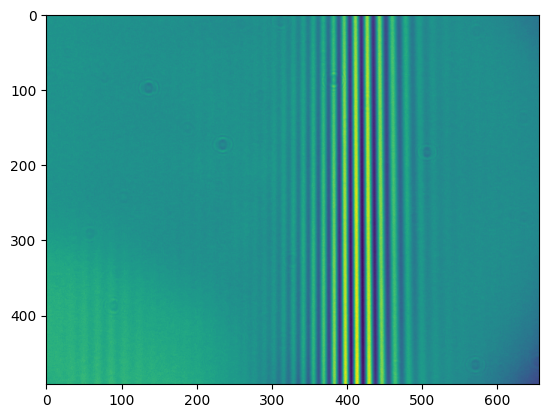

In [11]:
#f = open('data\\elin_mock_interferogram.csv', 'rt')
#C = np.loadtxt(f, skiprows=0, delimiter = ";")
#f.close()
im = Image.open('data\\ir_fringes7.tif')
C = np.array(im, dtype= np.float32)
plt.imshow(C)

C:\Users\syf83691\AppData\Local\Temp\ipykernel_24408\13283421.py:19: RuntimeWarning: divide by zero encountered in divide
  um = (2 * sin_theta_incident) /kd


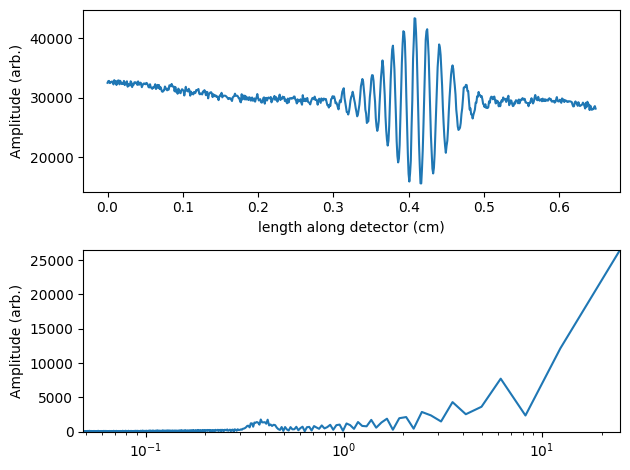

In [12]:
theta = 0.07  # ANGLE BETWEEN TWO BEAMS
sin_theta_incident = np.sin(theta * np.pi / 180) #convert theta to radians and find sin(theta)
dx = 9.9  # 2.2%500% in um this is the spacing between pixels - Thz is 0.5mm (500um)   PIXEL PITCH

npoints = C.shape[1]
shave = 0 #this is here to get rid of dead pixels
x = C[330, shave:] #only one 'slice' of the interferogram is used
y = np.arange(shave, npoints)  # y is just in points

plt.subplot(2, 1, 1)
plt.plot(y * dx * 1e-4, x) #1e-4 converts um to cm
plt.xlabel('length along detector (cm)')
plt.ylabel('Amplitude (arb.)')
In = np.vstack((y, x)).T
np.savetxt('interferogram.txt', In, fmt='%6.9f %12.9f')

spectrum, kd = single_sided_ft(x, 1.0 / dx)

um = (2 * sin_theta_incident) /kd
#um_max = np.max([wavelength for wavelength in um if wavelength != np.inf]) #might be useful later

I3 = np.argmax(um > 90) #this section is supposed to find spectrum peaks but it doesn't work.
I4 = np.argmax(um > 80)
sigum = um[I3:I4]
sigB1 = spectrum[I3:I4]
Signalfit = np.vstack((sigum.flatten(), sigB1))

plt.subplot(2, 1, 2)
plt.plot(um, spectrum)
index = 1 #change the index to remove low freqencies. 0 means all frequencies are plotted. Note that um is in decending order.
plt.axis([np.min(um), um[index], 0, np.max(spectrum[index:])])
plt.ylabel('Amplitude (arb.)')
plt.xscale("log")

plt.tight_layout() #prevents graphics from overlapping
plt.show()

In [13]:
B95 = np.vstack((um.flatten(), spectrum)).T
np.savetxt('outputwave.txt', B95, fmt='%6.9f %12.9f')